In [19]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.5.0
2.5.0


In [20]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

In [21]:
print(X_train_full.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [22]:
X_valid,X_train=X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
X_test=X_test/255.0

In [23]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [24]:
model=keras.models.Sequential([keras.layers.Flatten(input_shape=[28,28],name='flatten'),
                              keras.layers.Dense(300,activation='relu',name='hidden1'),
                              keras.layers.Dense(100,activation='relu',name='hidden2'),
                              keras.layers.Dense(10,activation='softmax',name='output')])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
hidden1 (Dense)              (None, 300)               235500    
_________________________________________________________________
hidden2 (Dense)              (None, 100)               30100     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [26]:
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7069 - accuracy: 0.7696 - val_loss: 0.5008 - val_accuracy: 0.8324
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4851 - accuracy: 0.8315 - val_loss: 0.4410 - val_accuracy: 0.8488
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4398 - accuracy: 0.8466 - val_loss: 0.4298 - val_accuracy: 0.8536
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4128 - accuracy: 0.8552 - val_loss: 0.4216 - val_accuracy: 0.8548
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3909 - accuracy: 0.8620 - val_loss: 0.3914 - val_accuracy: 0.8636
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3765 - accuracy: 0.8673 - val_loss: 0.3804 - val_accuracy: 0.8650
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3631 - accuracy: 0.8731 - val_loss: 0.3642 - val_accuracy:

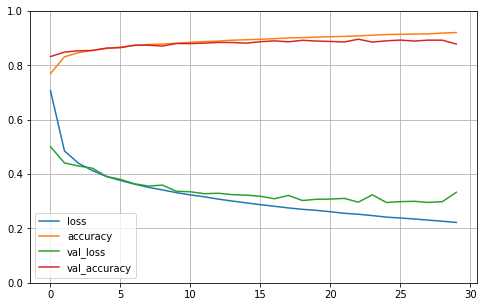

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [28]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3664 - accuracy: 0.8669


[0.3663526475429535, 0.8669000267982483]

In [29]:
import numpy as np
X_new=X_test[:3]
y_prob=model.predict(X_new)
print(y_prob.round(2))
y_pred=np.argmax(model.predict(X_new),axis=1)
np.array(class_names)[y_pred]

[[0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.99]
 [0.   0.   0.92 0.   0.07 0.   0.01 0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

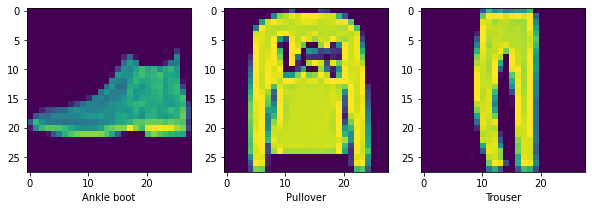

In [30]:
## ID:1912360
## NAME: ANCHAERIN
plt.figure(figsize=(10,10))
for img in range(3):
    plt.subplot(1,3,img+1)
    plt.grid(False)
    plt.imshow(X_new[img])
    plt.xlabel(class_names[y_pred[img]])